<a href="https://colab.research.google.com/github/davidmorme/Universidad/blob/main/Ecuaciones%20diferenciales/Taller_final_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #bases dedatos, tablas
import numpy as np #arreglos, funciones matematicas
import matplotlib.pyplot as plt #graficos
import sympy #cálculo simbolico

In [2]:
#Metodo de Euler
def euler (a,b,n,yinicial,funcion): #funcion con parámetros necesarios para el metodo.
  h=(b-a)/n
  t=a
  w=yinicial
  lista=[[t,w]]
  for i in range(n):
      w=w+h*funcion(t,w)
      t=a+(i+1)*h
      lista.append([t,w])
  return lista #El resultado es una lista con los puntos aproximando la solución

In [3]:
#METODO DE HEUN
def heun (a,b,n,yinicial,funcion):
    h=(b-a)/n
    t=a
    w=yinicial
    listaH=[[t,w]]
    for i in range(n):
        f=funcion(t,w)
        v=w+h*f
        t=a+((i+1)*h)
        w=w+((f+funcion(t,v))*h/2)
        listaH.append([t,w])
    return listaH


In [4]:
#Runge kutta
def Runge (a,b,n,yinicial,funcion):
    h=(b-a)/n
    t=a
    w=yinicial
    listaR=[[t,w]]
    for i in range(n):
        m_1=h*funcion(t,w)
        m_2=h*funcion(t+h/2,w+m_1/2)
        m_3=h*funcion(t+h/2,w+m_2/2)
        m_4=h*funcion(t+h,w+m_3)
        w=w+1.0/6.0*(m_1+2.0*m_2+2.0*m_3+m_4)
        t=a+((i+1)*h)
        listaR.append([t,w])
    return listaR

In [5]:
def suma (t,y):
  return t*sympy.exp(3*t)-2*y 
A=np.array(euler(0,1,2,0,suma))
A

array([[0, 0],
       [0.5, 0],
       [1.0, 1.12042226758452]], dtype=object)

In [6]:
sympy.init_printing(use_latex='mathjax')# escribe simbolicamente la ecuación diferencial.
t = sympy.Symbol('t')
y = sympy.Function('y')
# expreso la ecuacion
f = t*sympy.exp(3*t)-2*(y(t))
sympy.Eq(y(t).diff(t), f)

d             3⋅t         
──(y(t)) = t⋅ℯ    - 2⋅y(t)
dt                        

In [7]:
sol=sympy.dsolve(y(t).diff(t) - f) #Resuelve la ecuación diferencial
ics={ y (0): 0} #condiciones iniciales
sol

       ⎛                5⋅t⎞      
       ⎜     (5⋅t - 1)⋅ℯ   ⎟  -2⋅t
y(t) = ⎜C₁ + ──────────────⎟⋅ℯ    
       ⎝           25      ⎠      

In [8]:
C_eq = sympy.Eq(sol.lhs.subs(t, 0).subs(ics), sol.rhs.subs(t, 0))#reemplaza condiciones iniciales
C=sympy.solve(C_eq)#soluciona la ecuación del paso anterior
C[0]#imprime la solución 

1/25

In [9]:
y=(1/25 +(sympy.exp(5*t)/25)*(5*t-1))*sympy.exp(-2*t)

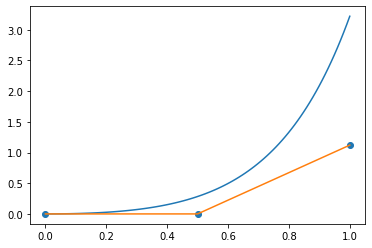

In [10]:
t = np.linspace(0,1,100)
y=(1/25 +(np.exp(5*t)/25)*(5*t-1))*np.exp(-2*t)
plt.plot(t, y)

A=np.array(euler(0,1,2,0,suma))# Graficar puntos solución metodo euler
plt.scatter(A[:,0], A[:,1])

T = np.linspace(0, 1, 3) #graficar poligonal
Y = list(A[:,1])
plt.plot(T, Y)

plt.show()

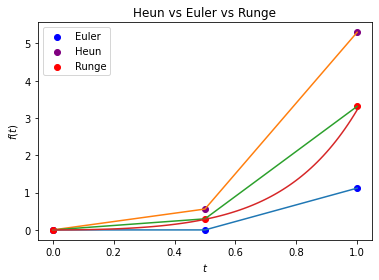

In [11]:
A=euler(0,1,2,0,suma)
A=np.array(A)

B=heun(0,1,2,0,suma)
B=np.array(B)

C=Runge(0,1,2,0,suma)
C=np.array(C)

plt.scatter(A[:,0], A[:,1], color = 'blue', label='Euler')

plt.scatter(B[:,0], B[:,1], color = 'purple', label='Heun')

plt.scatter(C[:,0], C[:,1], color = 'red', label='Runge')

TE = np.linspace(0, 1, 3) #graficar poligonal Euler
YE = list(A[:,1])
plt.plot(TE, YE)

TH = np.linspace(0, 1, 3) #graficar poligonal Heun
YH = list(B[:,1])
plt.plot(TH, YH)

TR = np.linspace(0, 1, 3) #graficar poligonal Runge
YR = list(C[:,1])
plt.plot(TR, YR)

t = np.linspace(0,1,100) #Graficar solución analítica
y=(1/25 +(np.exp(5*t)/25)*(5*t-1))*np.exp(-2*t)
plt.plot(t, y)

plt.title('Heun vs Euler vs Runge') #titulo de la grafica
plt.xlabel('$t$') #nombra los ejes
plt.ylabel('$f(t)$')
plt.legend()
plt.show()

In [12]:
T = np.linspace(0, 1, 3)
YA = (1/25 +(np.exp(5*T)/25)*(5*T-1))*np.exp(-2*T)
YA=list(YA)
YAYR=[]
YAYE=[]
YAYH=[]
for i in range (3):
    y=YA[i]-YE[i]
    z=YA[i]-YH[i]
    r=YA[i]-YR[i]
    YAYE.append(y)
    YAYH.append(z)
    YAYR.append(r)
Errores = {'Analítica' : YA, 'Euler': YE, 'Heun':YH, 'Runge':YR}
data_frame = pd.DataFrame(Errores)
print (data_frame)

   Analítica             Euler               Heun              Runge
0   0.000000                 0                  0                  0
1   0.283617                 0  0.560211133792258  0.296997462129329
2   3.219099  1.12042226758452   5.30148979769305   3.31431177747785


In [13]:
Errores1 = {'A-E':YAYE, 'A-H':YAYH, 'A-R':YAYR}
data_frame1 = pd.DataFrame(Errores1)
print (data_frame1)

                 A-E                 A-H                  A-R
0                  0                   0                    0
1  0.283616521867142  -0.276594611925116  -0.0133809402621879
2   2.09867705145497   -2.08239047865355  -0.0952124584383545


In [14]:
#Para el error en porcentaje se determina de la siguiente forma
YAYR1=[]
YAYE1=[]
YAYH1=[]
for i in range (3):
    a=100*sympy.Abs(YA[i]-YE[i])/YA[i]
    b=100*sympy.Abs(YA[i]-YH[i])/YA[i]
    c=100*sympy.Abs(YA[i]-YR[i])/YA[i]
    YAYE1.append(a)
    YAYH1.append(b)
    YAYR1.append(c)
Errores12 = {'%Error Euler' : YAYE1, '%Error Heun': YAYH1, '%Error Runge': YAYR1}
data_frame12 = pd.DataFrame(Errores12)
print (data_frame12)

       %Error Euler       %Error Heun      %Error Runge
0               nan               nan               nan
1  100.000000000000  97.5241534252668  4.71796924033083
2  65.1945418099487  64.6886061059742  2.95773596904005


In [15]:
#Punto 1)b
def suma2 (t,y):
  return 1+ sympy.expand_power_exp((t-y)**2)
A2=np.array(euler(2,3,2,1,suma2))
A2

array([[2, 1],
       [2.5, 2.00000000000000],
       [3.0, 2.62500000000000]], dtype=object)

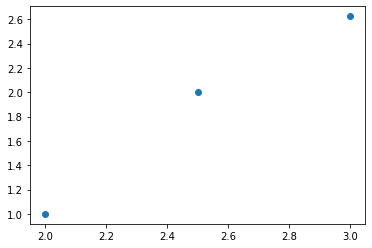

In [16]:
plt.scatter(A2[:,0], A2[:,1])
plt.show()

In [17]:
sympy.init_printing(use_latex='mathjax')# escribe simbolicamente la ecuación diferencial.
t = sympy.Symbol('t')
y = sympy.Function('y')
# expreso la ecuacion
f2 = 1+ sympy.expand_power_exp((t-(y(t)))**2)
sympy.Eq(y(t).diff(t), f2)

d                    2    
──(y(t)) = (t - y(t))  + 1
dt                        

In [18]:
sol= sympy.dsolve(y(t).diff(t)-f2)  #Resuelve la ecuación diferencial
ics={ y (2): 1} #condiciones iniciales
sol

         ⎛  2    ⎞          3  2     4  3     5  4     6  5    ⎛ 6⎞
y(t) = t⋅⎝C₁  + 1⎠ + C₁ + C₁ ⋅t  + C₁ ⋅t  + C₁ ⋅t  + C₁ ⋅t  + O⎝t ⎠

In [20]:
C_eq = sympy.Eq(sol.lhs.subs(t, 2).subs(ics), sol.rhs.subs(t, 2))#reemplaza condiciones iniciales
C=sympy.solve(C_eq)#soluciona la ecuación del paso anterior
C#imprime la solución

[]

In [ ]:
#No hay solución análitica para esta ecuación debio a que no se puede hallar C. 
#Sin embargo se sabe que es de la forma 
# y= C + Ct + Ct^(2)/2 + Ct^(3) + Ct^(4)/24 + Ct^(5)/120*[C(C+1) - C - 1] + t^(6)

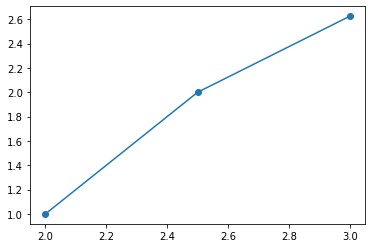

In [21]:
A2=np.array(euler(2,3,2,1,suma2))# Graficar puntos solución metodo euler
plt.scatter(A2[:,0], A2[:,1])

T = np.linspace(2, 3, 3) #graficar poligonal
Y = list(A2[:,1])
plt.plot(T, Y)
plt.show()

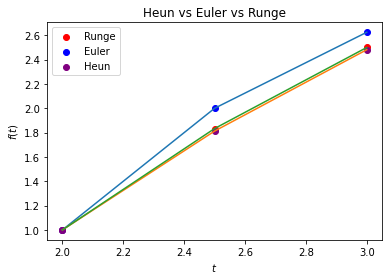

In [22]:
A2=euler(2,3,2,1,suma2)
A2=np.array(A2)

B2=heun(2,3,2,1,suma2)
B2=np.array(B2)

C2=Runge(2,3,2,1,suma2)
C2=np.array(C2)

plt.scatter(C2[:,0], C2[:,1], color = 'red', label='Runge')

plt.scatter(A2[:,0], A2[:,1], color = 'blue', label='Euler')

plt.scatter(B2[:,0], B2[:,1], color = 'purple', label='Heun')

TE2 = np.linspace(2, 3, 3) #graficar poligonal Euler
YE2 = list(A2[:,1])
plt.plot(TE2, YE2)

TH2 = np.linspace(2, 3, 3) #graficar poligonal Heun
YH2 = list(B2[:,1])
plt.plot(TH2, YH2)

TR2 = np.linspace(2, 3, 3) #graficar poligonal Runge
YR2 = list(C2[:,1])
plt.plot(TR2, YR2)

plt.title('Heun vs Euler vs Runge') #titulo de la grafica
plt.xlabel('$t$') #nombra los ejes
plt.ylabel('$f(t)$')
plt.legend()
plt.show()

In [23]:
#Como no se pudo hallar un valor analítico no se puede encotrar la solución de este
Errores2 = {'Euler': YE2, 'Heun':YH2, 'Runge':YR2}
data_frame2 = pd.DataFrame(Errores2)
print (data_frame2)

              Euler              Heun             Runge
0                 1                 1                 1
1  2.00000000000000  1.81250000000000  1.83332336073120
2  2.62500000000000  2.48155307769775  2.49997119342618


In [24]:
#Punto 1)c
def suma3 (t,y):
  return 1+ y/t

In [25]:
#Solución analítica
sympy.init_printing(use_latex='mathjax')# escribe simbolicamente la ecuación diferencial.
t = sympy.Symbol('t')
y = sympy.Function('y')
# expreso la ecuacion
f3 = 1 + (y(t))/t
sympy.Eq(y(t).diff(t), f3)

d              y(t)
──(y(t)) = 1 + ────
dt              t  

In [26]:
sol= sympy.dsolve(y(t).diff(t)-f3)  #Resuelve la ecuación diferencial
ics={ y (1): 2} #condiciones iniciales
sol

y(t) = t⋅(C₁ + log(t))

In [27]:
C_eq = sympy.Eq(sol.lhs.subs(t, 1).subs(ics), sol.rhs.subs(t, 1))#reemplaza condiciones iniciales
C=sympy.solve(C_eq)#soluciona la ecuación del paso anterior
C[0]#imprime la solución

2

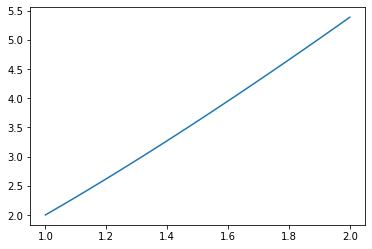

In [28]:
t = np.linspace(1,2,100)
y= t*(2+np.log(t))
plt.plot(t, y)

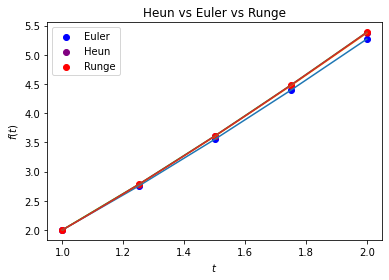

In [29]:
A3=euler(1,2,4,2,suma3)
A3=np.array(A3)

B3=heun(1,2,4,2,suma3)
B3=np.array(B3)

C3=Runge(1,2,4,2,suma3)
C3=np.array(C3)

plt.scatter(A3[:,0], A3[:,1], color = 'blue', label='Euler')

plt.scatter(B3[:,0], B3[:,1], color = 'purple', label='Heun')

plt.scatter(C3[:,0], C3[:,1], color = 'red', label='Runge')

TE3 = np.linspace(1, 2, 5) #graficar poligonal Euler
YE3 = list(A3[:,1])
plt.plot(TE3, YE3)

TH3 = np.linspace(1, 2, 5) #graficar poligonal Heun
YH3 = list(B3[:,1])
plt.plot(TH3, YH3)

TR3 = np.linspace(1, 2, 5) #graficar poligonal Runge
YR3 = list(C3[:,1])
plt.plot(TR3, YR3)

t = np.linspace(1,2,100) #Graficar solución analítica
y= t*(2+np.log(t))
plt.plot(t, y)

plt.title('Heun vs Euler vs Runge') #titulo de la grafica
plt.xlabel('$t$') #nombra los ejes
plt.ylabel('$f(t)$')
plt.legend()
plt.show()

In [30]:
T = np.linspace(1, 2, 5)
YA3 = T*(2 + np.log(T))
YA3=list(YA3)

YAYE3=[]
YAYR3=[]
YAYH3=[]

for i in range (5):
    y3=YA3[i]-YE3[i]
    z3=YA3[i]-YH3[i]
    r3=YA3[i]-YR3[i]
    YAYE3.append(y3)
    YAYH3.append(z3)
    YAYR3.append(r3)
Errores3 = {'Analítica' : YA3, 'Euler': YE3, 'Heun':YH3, 'Runge':YR3}
data_frame3 = pd.DataFrame(Errores3)
print (data_frame3)

   Analítica     Euler      Heun     Runge
0   2.000000  2.000000  2.000000  2.000000
1   2.778929  2.750000  2.775000  2.778909
2   3.608198  3.550000  3.600833  3.608165
3   4.479328  4.391667  4.468829  4.479285
4   5.386294  5.269048  5.372859  5.386243


In [31]:
Errores31 = {'A-E':YAYE3, 'A-H':YAYH3, 'A-R':YAYR3}
data_frame31 = pd.DataFrame(Errores31)
print (data_frame31)

        A-E       A-H       A-R
0  0.000000  0.000000  0.000000
1  0.028929  0.003929  0.000020
2  0.058198  0.007364  0.000033
3  0.087661  0.010498  0.000043
4  0.117247  0.013436  0.000052


In [32]:
#Para el error en porcentaje se determina de la siguiente forma
YAYR31=[]
YAYE31=[]
YAYH31=[]
for i in range (5):
    a3=100*sympy.Abs(YA3[i]-YE3[i])/YA3[i]
    b3=100*sympy.Abs(YA3[i]-YH3[i])/YA3[i]
    c3=100*sympy.Abs(YA3[i]-YR3[i])/YA3[i]
    YAYE31.append(a3)
    YAYH31.append(b3)
    YAYR31.append(c3)
Errores32 = {'%Error Euler' : YAYE31, '%Error Heun': YAYH31, '%Error Runge': YAYR31}
data_frame32 = pd.DataFrame(Errores32)
print (data_frame32)

       %Error Euler        %Error Heun          %Error Runge
0                 0                  0                     0
1  1.04102820083428  0.141401184478227  0.000718770397845536
2  1.61292888060272  0.204099927954076  0.000912756904131350
3  1.95701162056112  0.234371420833830  0.000960539616134197
4  2.17676076002453  0.249444239924418  0.000961186071841531


In [33]:
################  Punto 1)d  ##################
def suma4 (t,y):
  return sympy.cos(2*t) + sympy.sin(3*t)

In [34]:
#Solución analítica
sympy.init_printing(use_latex='mathjax')# escribe simbolicamente la ecuación diferencial.
t = sympy.Symbol('t')
y = sympy.Function('y')
# expreso la ecuacion
f4 = sympy.cos(2*t) + sympy.sin(3*t)
sympy.Eq(y(t).diff(t), f4)

d                             
──(y(t)) = sin(3⋅t) + cos(2⋅t)
dt                            

In [35]:
sol= sympy.dsolve(y(t).diff(t)-f4)  #Resuelve la ecuación diferencial
ics={ y (0): 1} #condiciones iniciales
sol

            sin(2⋅t)   cos(3⋅t)
y(t) = C₁ + ──────── - ────────
               2          3    

In [36]:
C_eq = sympy.Eq(sol.lhs.subs(t, 0).subs(ics), sol.rhs.subs(t, 0))#reemplaza condiciones iniciales
C=sympy.solve(C_eq)#soluciona la ecuación del paso anterior
C[0]#imprime la solución

4/3

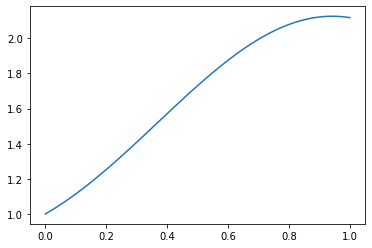

In [37]:
t = np.linspace(0,1,100)
y= 4/3 + np.sin(2*t)/2 - np.cos(3*t)/3
plt.plot(t, y)

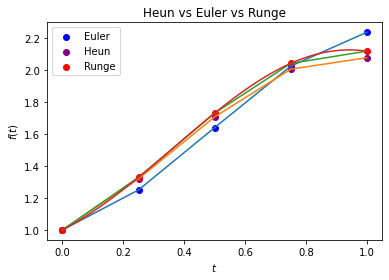

In [38]:
A4=euler(0,1,4,1,suma4)
A4=np.array(A4)

B4=heun(0,1,4,1,suma4)
B4=np.array(B4)

C4=Runge(0,1,4,1,suma4)
C4=np.array(C4)

plt.scatter(A4[:,0], A4[:,1], color = 'blue', label='Euler')

plt.scatter(B4[:,0], B4[:,1], color = 'purple', label='Heun')

plt.scatter(C4[:,0], C4[:,1], color = 'red', label='Runge')

TE4 = np.linspace(0, 1, 5) #graficar poligonal Euler
YE4 = list(A4[:,1])
plt.plot(TE4, YE4)

TH4 = np.linspace(0, 1, 5) #graficar poligonal Heun
YH4 = list(B4[:,1])
plt.plot(TH4, YH4)

TR4 = np.linspace(0, 1, 5) #graficar poligonal Runge
YR4 = list(C4[:,1])
plt.plot(TR4, YR4)

t = np.linspace(0,1,100) #Graficar solución analítica
y= 4/3 + np.sin(2*t)/2 - np.cos(3*t)/3
plt.plot(t, y)

plt.title('Heun vs Euler vs Runge') #titulo de la grafica
plt.xlabel('$t$') #nombra los ejes
plt.ylabel('$f(t)$')
plt.legend()
plt.show()

In [39]:
T = np.linspace(0, 1, 5)
YA4 = 4/3 + np.sin(2*T)/2 - np.cos(3*T)/3
YA4=list(YA4)

YAYE4=[]
YAYR4=[]
YAYH4=[]

for i in range (5):
    y4=YA4[i]-YE4[i]
    z4=YA4[i]-YH4[i]
    r4=YA4[i]-YR4[i]
    YAYE4.append(y4)
    YAYH4.append(z4)
    YAYR4.append(r4)
Errores4 = {'Analítica' : YA4, 'Euler': YE4, 'Heun':YH4, 'Runge':YR4}
data_frame4 = pd.DataFrame(Errores4)
print (data_frame4)

   Analítica             Euler              Heun             Runge
0   1.000000                 1                 1                 1
1   1.329150  1.25000000000000  1.31990266523921  1.32916504687919
2   1.730490  1.63980533047843  1.70702999203745  1.73053356630742
3   2.041472  2.02425465359648  2.00535595341593  2.04154357743440
4   2.117980  2.23645725323538  2.07707889967447  2.11806360001402


In [40]:
Errores41 = {'A-E':YAYE4, 'A-H':YAYH4, 'A-R':YAYR4}
data_frame41 = pd.DataFrame(Errores41)
print (data_frame41)

                  A-E                  A-H                   A-R
0                   0                    0                     0
1  0.0791498130108277  0.00924714777161428  -1.52338683587772e-5
2  0.0906844280362871   0.0234597664772629  -4.38077927042979e-5
3  0.0172173806131313   0.0361160807936787  -7.15432247972991e-5
4  -0.118477707622393   0.0409006459385171  -8.40544010292099e-5


In [41]:
#Para el error en porcentaje se determina de la siguiente forma
YAYR41=[]
YAYE41=[]
YAYH41=[]
for i in range (5):
    a4=100*sympy.Abs(YA4[i]-YE4[i])/YA4[i]
    b4=100*sympy.Abs(YA4[i]-YH4[i])/YA4[i]
    c4=100*sympy.Abs(YA4[i]-YR4[i])/YA4[i]
    YAYE41.append(a4)
    YAYH41.append(b4)
    YAYR41.append(c4)
Errores42 = {'%Error Euler' : YAYE41, '%Error Heun': YAYH41, '%Error Runge': YAYR41}
data_frame42 = pd.DataFrame(Errores42)
print (data_frame42)

        %Error Euler        %Error Heun         %Error Runge
0                  0                  0                    0
1   5.95492037361351  0.695718998798742  0.00114613629025527
2   5.24039091188392   1.35567207848710  0.00253152568449167
3  0.843380674562965   1.76911954650712  0.00350449203312248
4   5.59390235225820   1.93111619152486  0.00396861250163220


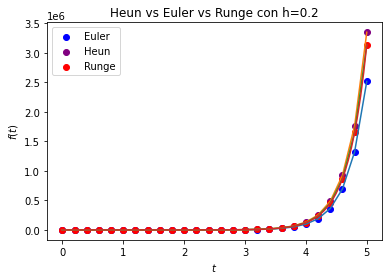

In [42]:
#################### Punto 2 ############################
############# con h=0.2  ##################

A51=euler(0,5,25,0,suma)
A51=np.array(A51)

B51=heun(0,5,25,0,suma)
B51=np.array(B51)

C51=Runge(0,5,25,0,suma)
C51=np.array(C51)

plt.scatter(A51[:,0], A51[:,1], color = 'blue', label='Euler')

plt.scatter(B51[:,0], B51[:,1], color = 'purple', label='Heun')

plt.scatter(C51[:,0], C51[:,1], color = 'red', label='Runge')

TE51 = np.linspace(0, 5, 26) #graficar poligonal Euler
YE51 = list(A51[:,1])
plt.plot(TE51, YE51)

TH51 = np.linspace(0, 5, 26) #graficar poligonal Heun
YH51 = list(B51[:,1])
plt.plot(TH51, YH51)

TR51 = np.linspace(0, 5, 26) #graficar poligonal Runge
YR51 = list(C51[:,1])
plt.plot(TR51, YR51)

t = np.linspace(0,5,100) #Graficar solución analítica
y= (1/25 +(np.exp(5*t)/25)*(5*t-1))*np.exp(-2*t)
plt.plot(t, y)

plt.title('Heun vs Euler vs Runge con h=0.2') #titulo de la grafica
plt.xlabel('$t$') #nombra los ejes
plt.ylabel('$f(t)$')
plt.legend()
plt.show()


In [43]:
YA = float((1/25 +(sympy.exp(5*5)/25)*(5*5-1))*sympy.exp(-2*5))

print('Analítica\n', YA, '\nEuler\n', YE51[25], '\nHeun\n',YH51[25], '\nRunge\n',YR51[25])

Analítica
 3138256.677575042 
Euler
 2515352.54225275 
Heun
 3349442.72845725 
Runge
 3139993.21228042


In [44]:
YAYE51=sympy.Abs(YA-YE51[25])
YAYH51=sympy.Abs(YA-YH51[25])
YAYR51=sympy.Abs(YA-YR51[25])
print('Analítica - Euler\n',YAYE51 , '\nAnalítica - Heun\n',YAYH51, '\nAnalítica - Runge\n',YAYR51)

Analítica - Euler
 622904.135322296 
Analítica - Heun
 211186.050882210 
Analítica - Runge
 1736.53470538277


In [45]:
#Para el error en porcentaje se determina de la siguiente forma
YAYEp5=[]
YAYHp5=[]
YAYRp5=[]

YAYEp51=100*sympy.Abs(YA-YE51[25])/YA
YAYHp51=100*sympy.Abs(YA-YH51[25])/YA
YAYRp51=100*sympy.Abs(YA-YR51[25])/YA

YAYEp5.append(YAYEp51)
YAYHp5.append(YAYHp51)
YAYRp5.append(YAYRp51)
print('% Error Euler\n',YAYEp51 , '\n% Error Heun\n',YAYHp51, '\n% Error Runge\n',YAYRp51)

% Error Euler
 19.8487312963712 
% Error Heun
 6.72940656483826 
% Error Runge
 0.0553343745841913


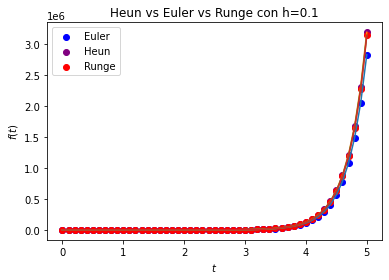

In [46]:
################## con h=0.1 ################

A52=euler(0,5,50,0,suma)
A52=np.array(A52)

B52=heun(0,5,50,0,suma)
B52=np.array(B52)

C52=Runge(0,5,50,0,suma)
C52=np.array(C52)

plt.scatter(A52[:,0], A52[:,1], color = 'blue', label='Euler')

plt.scatter(B52[:,0], B52[:,1], color = 'purple', label='Heun')

plt.scatter(C52[:,0], C52[:,1], color = 'red', label='Runge')

TE52 = np.linspace(0, 5, 51) #graficar poligonal Euler
YE52 = list(A52[:,1])
plt.plot(TE52, YE52)

TH52 = np.linspace(0, 5, 51) #graficar poligonal Heun
YH52 = list(B52[:,1])
plt.plot(TH52, YH52)

TR52 = np.linspace(0, 5, 51) #graficar poligonal Runge
YR52 = list(C52[:,1])
plt.plot(TR52, YR52)

t = np.linspace(0,5,100) #Graficar solución analítica
y= (1/25 +(np.exp(5*t)/25)*(5*t-1))*np.exp(-2*t)
plt.plot(t, y)

plt.title('Heun vs Euler vs Runge con h=0.1') #titulo de la grafica
plt.xlabel('$t$') #nombra los ejes
plt.ylabel('$f(t)$')
plt.legend()
plt.show()


In [47]:
YA = float((1/25 +(sympy.exp(5*5)/25)*(5*5-1))*sympy.exp(-2*5))

print('Analítica\n', YA, '\nEuler\n', YE52[50], '\nHeun\n',YH52[50], '\nRunge\n',YR52[50])

Analítica
 3138256.677575042 
Euler
 2826647.38257291 
Heun
 3188630.43055348 
Runge
 3138365.90161438


In [48]:
YAYE52=sympy.Abs(YA-YE52[50])
YAYH52=sympy.Abs(YA-YH52[50])
YAYR52=sympy.Abs(YA-YR52[50])
print('Analítica - Euler\n',YAYE52 , '\nAnalítica - Heun\n',YAYH52, '\nAnalítica - Runge\n',YAYR52)

Analítica - Euler
 311609.295002137 
Analítica - Heun
 50373.7529784343 
Analítica - Runge
 109.224039339926


In [49]:
#Para el error en porcentaje se determina de la siguiente forma
YAYEp52=100*sympy.Abs(YA-YE52[50])/YA
YAYHp52=100*sympy.Abs(YA-YH52[50])/YA
YAYRp52=100*sympy.Abs(YA-YR52[50])/YA

YAYEp5.append(YAYEp52)
YAYHp5.append(YAYHp52)
YAYRp5.append(YAYRp52)

print('% Error Euler\n',YAYEp52 , '\n% Error Heun\n',YAYHp52, '\n% Error Runge\n',YAYRp52)

% Error Euler
 9.92937566989963 
% Error Heun
 1.60515082588332 
% Error Runge
 0.00348040490506737


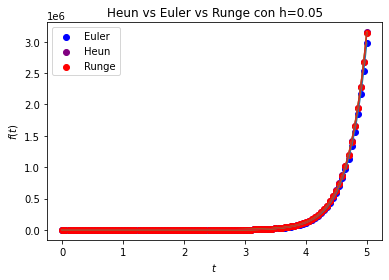

In [50]:
################## con h=0.05 ################

A53=euler(0,5,100,0,suma)
A53=np.array(A53)

B53=heun(0,5,100,0,suma)
B53=np.array(B53)

C53=Runge(0,5,100,0,suma)
C53=np.array(C53)

plt.scatter(A53[:,0], A53[:,1], color = 'blue', label='Euler')

plt.scatter(B53[:,0], B53[:,1], color = 'purple', label='Heun')

plt.scatter(C53[:,0], C53[:,1], color = 'red', label='Runge')

TE53 = np.linspace(0, 5, 101) #graficar poligonal Euler
YE53 = list(A53[:,1])
plt.plot(TE53, YE53)

TH53 = np.linspace(0, 5, 101) #graficar poligonal Heun
YH53 = list(B53[:,1])
plt.plot(TH53, YH53)

TR53 = np.linspace(0, 5, 101) #graficar poligonal Runge
YR53 = list(C53[:,1])
plt.plot(TR53, YR53)

t = np.linspace(0,5,100) #Graficar solución analítica
y= (1/25 +(np.exp(5*t)/25)*(5*t-1))*np.exp(-2*t)
plt.plot(t, y)

plt.title('Heun vs Euler vs Runge con h=0.05') #titulo de la grafica
plt.xlabel('$t$') #nombra los ejes
plt.ylabel('$f(t)$')
plt.legend()
plt.show()


In [51]:
YA = float((1/25 +(sympy.exp(5*5)/25)*(5*5-1))*sympy.exp(-2*5))

print('Analítica\n', YA, '\nEuler\n', YE53[100], '\nHeun\n',YH53[100], '\nRunge\n',YR53[100])

Analítica
 3138256.677575042 
Euler
 2982766.48896736 
Heun
 3150499.46431334 
Runge
 3138263.47730195


In [52]:
YAYE53=sympy.Abs(YA-YE53[100])
YAYH53=sympy.Abs(YA-YH53[100])
YAYR53=sympy.Abs(YA-YR53[100])
print('Analítica - Euler\n',YAYE53 , '\nAnalítica - Heun\n',YAYH53, '\nAnalítica - Runge\n',YAYR53)

Analítica - Euler
 155490.188607678 
Analítica - Heun
 12242.7867383012 
Analítica - Runge
 6.79972691088915


In [53]:
#Para el error en porcentaje se determina de la siguiente forma
YAYEp53=100*sympy.Abs(YA-YE53[100])/YA
YAYHp53=100*sympy.Abs(YA-YH53[100])/YA
YAYRp53=100*sympy.Abs(YA-YR53[100])/YA

YAYEp5.append(YAYEp53)
YAYHp5.append(YAYHp53)
YAYRp5.append(YAYRp53)

print('% Error Euler\n',YAYEp53 , '\n% Error Heun\n',YAYHp53, '\n% Error Runge\n',YAYRp53)

% Error Euler
 4.95466765732580 
% Error Heun
 0.390114257568035 
% Error Runge
 0.000216672108418594


In [54]:
#Comparamos los errores de cada modelo con los diferentes h comenzando con h=0.2, h=0.1 y h=0.05
Errores5 = {'%Error Euler' : YAYEp5, '%Error Heun': YAYHp5, '%Error Runge': YAYRp5}
data_frame5 = pd.DataFrame(Errores5)
print (data_frame5)

       %Error Euler        %Error Heun          %Error Runge
0  19.8487312963712   6.72940656483826    0.0553343745841913
1  9.92937566989963   1.60515082588332   0.00348040490506737
2  4.95466765732580  0.390114257568035  0.000216672108418594


**Se puede concluir que el mejor h para cada uno de los modelos es el de 0.05  teniendo una mejor exactitud**

In [55]:
################  Punto 3  ##################
def suma6 (t,y):
  return -10*y

In [56]:
#Solución analítica
sympy.init_printing(use_latex='mathjax')# escribe simbolicamente la ecuación diferencial.
t = sympy.Symbol('t')
y = sympy.Function('y')
# expreso la ecuacion
f6 = -10*(y(t))
sympy.Eq(y(t).diff(t), f6)

d                  
──(y(t)) = -10⋅y(t)
dt                 

In [57]:
sol= sympy.dsolve(y(t).diff(t)-f6)  #Resuelve la ecuación diferencial
ics={ y (0): 1} #condiciones iniciales
sol

           -10⋅t
y(t) = C₁⋅ℯ     

In [58]:
C_eq = sympy.Eq(sol.lhs.subs(t, 0).subs(ics), sol.rhs.subs(t, 0))#reemplaza condiciones iniciales
C=sympy.solve(C_eq)#soluciona la ecuación del paso anterior
C[0]#imprime la solución

1

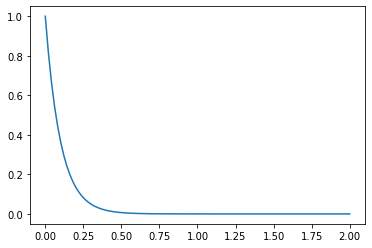

In [59]:
t = np.linspace(0,2,100)
y= np.exp(-10*t)
plt.plot(t, y)

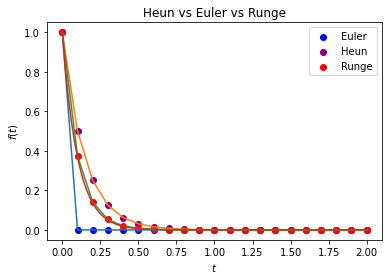

In [60]:
A6=euler(0,2,20,1,suma6)
A6=np.array(A6)

B6=heun(0,2,20,1,suma6)
B6=np.array(B6)

C6=Runge(0,2,20,1,suma6)
C6=np.array(C6)

plt.scatter(A6[:,0], A6[:,1], color = 'blue', label='Euler')

plt.scatter(B6[:,0], B6[:,1], color = 'purple', label='Heun')

plt.scatter(C6[:,0], C6[:,1], color = 'red', label='Runge')

TE6 = np.linspace(0, 2, 21) #graficar poligonal Euler
YE6 = list(A6[:,1])
plt.plot(TE6, YE6)

TH6 = np.linspace(0, 2, 21) #graficar poligonal Heun
YH6 = list(B6[:,1])
plt.plot(TH6, YH6)

TR6 = np.linspace(0, 2, 21) #graficar poligonal Runge
YR6 = list(C6[:,1])
plt.plot(TR6, YR6)

t = np.linspace(0,2,100) #Graficar solución analítica
y= np.exp(-10*t)
plt.plot(t, y)

plt.title('Heun vs Euler vs Runge') #titulo de la grafica
plt.xlabel('$t$') #nombra los ejes
plt.ylabel('$f(t)$')
plt.legend()
plt.show()

Se ve claramente que el módelo de Euler baja abruptamente en el segundo punto cuando no debería ser así.

A continuación cambiaremos el dato h para todos con h=0.02

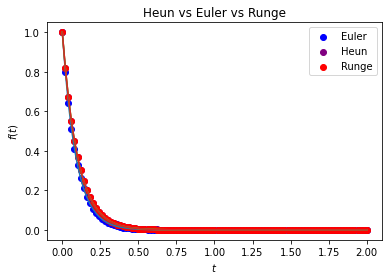

In [61]:
A61=euler(0,2,100,1,suma6)
A61=np.array(A61)

B61=heun(0,2,100,1,suma6)
B61=np.array(B61)

C61=Runge(0,2,100,1,suma6)
C61=np.array(C61)

plt.scatter(A61[:,0], A61[:,1], color = 'blue', label='Euler')

plt.scatter(B61[:,0], B61[:,1], color = 'purple', label='Heun')

plt.scatter(C61[:,0], C61[:,1], color = 'red', label='Runge')

TE61 = np.linspace(0, 2, 101) #graficar poligonal Euler
YE61 = list(A61[:,1])
plt.plot(TE61, YE61)

TH61 = np.linspace(0, 2, 101) #graficar poligonal Heun
YH61 = list(B61[:,1])
plt.plot(TH61, YH61)

TR61 = np.linspace(0, 2, 101) #graficar poligonal Runge
YR61 = list(C61[:,1])
plt.plot(TR61, YR61)

t = np.linspace(0,2,100) #Graficar solución analítica
y= np.exp(-10*t)
plt.plot(t, y)

plt.title('Heun vs Euler vs Runge') #titulo de la grafica
plt.xlabel('$t$') #nombra los ejes
plt.ylabel('$f(t)$')
plt.legend()
plt.show()

En este caso alaumentar el numero de h sí se ve un cambio y mejoría en el módelo de Euler, en este caso no teniendo el cambio abrupto.

#################### Punto 4 ################
Sabemos que A(x)=π*r^2, entonces debemos hallar cómo varía r según x.

Debido a la forma del cono, sabemos que r va a variar de la siguiente forma:

r=ro + B*X

siendo ro el radio de salida y B la pendiente con la que varía el radio, y esta la podemos hallar con los valores iniciales.

V(0)=512*π/3    
 x(0)=8

teniendo en cuenta la ecuación de volumen según su altura:

V=π/3*x*(ro^2 + r^2 + ro*r)

Reemplazando e igualando a 0

r^2 + 0.1 - 63.99 = 0

Se hace cuadrática para determinar r en esa altura

In [62]:
r1=(-0.1+sympy.sqrt((0.1)**2+4*63.99))/2
r1

7.94953123626629

Sabemos que B = (r1-ro)/x(0)

In [63]:
B=(r1-0.1)/8
B

0.981191404533286

Por lo tanto, A(x) = π**(ro + B*x)^2

In [64]:
def suma7 (t,x):
  return -0.006*sympy.sqrt(2*32.1)*sympy.sqrt(x)/((0.1+B*x)**2)

In [65]:
#Solución analítica
sympy.init_printing(use_latex='mathjax')# escribe simbolicamente la ecuación diferencial.
t = sympy.Symbol('t')
x = sympy.Function('x')
# expreso la ecuacion
f7 = -0.006*sympy.sqrt(2*32.1)*sympy.sqrt((x(t)))/((0.1+B*(x(t)))**2)
sympy.Eq(x(t).diff(t), f7)

                                 ______ 
d          -0.0499357174946351⋅╲╱ x(t)  
──(x(t)) = ─────────────────────────────
dt                                    2 
            (x(t) + 0.101916914006769)  

In [66]:
sol= sympy.dsolve(x(t).diff(t)-f7)  #Resuelve la ecuación diferencial
ics={ x (0): 8} #condiciones iniciales
sol

PolynomialDivisionFailed: ignored

Según el error mostrado podemos ver que no hay solución analítica para la función

In [ ]:
A7=euler(0,600,30,8,suma7)

In [ ]:
A7=np.array(A7)

In [ ]:
XE7 = list(A7[:,1])

In [ ]:
C7=Runge(0,600,30,8,suma7)

In [ ]:
A7=euler(0,600,30,8,suma7)
A7=np.array(A7)

plt.scatter(A7[:,0], A7[:,1], color = 'blue', label='Euler')

TE7 = np.linspace(0, 600, 31) #graficar poligonal Euler
XE7 = list(A7[:,1])
plt.plot(TE7, XE7)

plt.title('Euler') #titulo de la grafica
plt.xlabel('$t$') #nombra los ejes
plt.ylabel('$f(t)$')
plt.legend()
plt.show()

In [ ]:
B7=heun(0,600,30,8,suma7)
B7=np.array(B7)

plt.scatter(B7[:,0], B7[:,1], color = 'purple', label='Heun')

TH7 = np.linspace(0, 600, 31) #graficar poligonal Heun
XH7 = list(B7[:,1])
plt.plot(TH7, XH7)

plt.title('Heun') #titulo de la grafica
plt.xlabel('$t$') #nombra los ejes
plt.ylabel('$f(t)$')
plt.legend()
plt.show()

In [ ]:
C7=Runge(0,600,30,8,suma7)
C7=np.array(C7)

plt.scatter(C7[:,0], C7[:,1], color = 'red', label='Runge')

TR7 = np.linspace(0, 600, 31) #graficar poligonal Runge
XR7 = list(C7[:,1])
plt.plot(TR7, XR7)

plt.title('Runge') #titulo de la grafica
plt.xlabel('$t$') #nombra los ejes
plt.ylabel('$f(t)$')
plt.legend()
plt.show()